In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from common import metadata, recordings

# choose session 7
root = '/Users/lukearend/phd/kfx/data'
file = '2022-08-11-01-55-00_M018_SAL_mPFC_HPC_0_0_0mpk_g0_t0.imec1.lf.bin'
path = os.path.join(root, file)
md = metadata.loc[(7, 'lfp', 'hpc')]
rec = recordings.loc[7]

In [2]:
# establish memory map to data
nchans = md.nchans
nsamples = md.sizebytes // nchans // 2
chanstart = int(rec.theta_start * 2) # restrict to hpc channels
chanend = int(rec.theta_end * 2)
recstart = int(rec.lfp_start) # restrict to behavior-aligned recording
recend = int(rec.lfp_end)
memmap = np.memmap(path, dtype='int16', mode='r', shape=(nchans, nsamples), offset=0, order='F')
lfp = memmap[chanstart:chanend, recstart:recend]

In [3]:
# choose a time block to read in
epoch = 0
offset = 60
duration = 10

In [4]:
# read in a time block of data
start = int((epoch * 1800 + offset) * md.samplerate)
nsamples = int(duration * md.samplerate)
int2microV = md.maxvolts / md.bitdepth / md.gain * 1e6
X = np.array(lfp[:, offset:offset + nsamples]).T * int2microV # convert to microV
X = X - np.median(X, axis=0) # remove DC offset per channel
X = X - np.median(X, axis=1, keepdims=True) # rereference to common average
X = (X[:, ::2] + X[:, 1::2]) / 2 # average across channels at same depth

In [5]:
h = 16 # z distance between channels, micrometers
csd = (X[:, 2:] - 2 * X[:, 1:-1] + X[:, :-2]) / h ** 2 

In [6]:
X.min()

-1652.34375

In [7]:
X.max()

2132.8125

In [11]:
print(rec)

lfp_start            38439.0
lfp_end           18060209.0
theta_start             60.0
theta_end              123.0
ripple_start           103.0
ripple_end             112.0
fisure                  75.0
oriens_start             0.0
oriens_stop             21.0
pyramid_start           22.0
pyramid_stop            26.0
rad_start               27.0
rad_stop                16.0
locmol_start            17.0
locmol_stop              7.0
dentup_start             8.0
dentup_stop             19.0
dentdown_start          20.0
dentdown_stop           31.0
Name: 7, dtype: float64


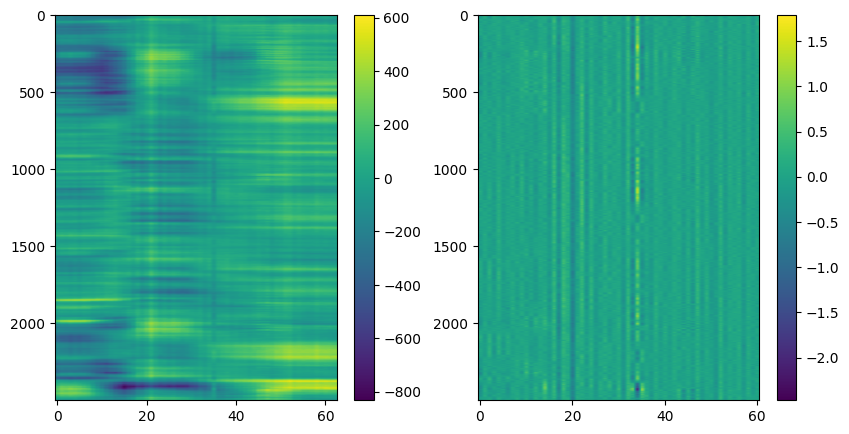

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.sca(axs[0])
plt.imshow(X[:2500], aspect='auto', cmap='viridis')
plt.colorbar()
plt.sca(axs[1])
plt.imshow(csd[:2500], aspect='auto', cmap='viridis')
plt.colorbar()